In [101]:
from demo import Spotify, Recommender
from demo.lib import DB
from demo.displays import Demo1

# 1.Spotify Search Program

In [103]:
db = DB()

search_sp = Spotify()
search_sp.search()

mailbox_id = db.save_mailbox(search_sp.sel_tracks)

Demo1.pt1(mailbox_id)
search_sp.sel_tracks.head()

계속하시려면 아무거나, 종료는 exit를 입력해주세요.exit


### 우체통 <u>'6295aa0a317d54d61fddad2d'</u>이 등록되었습니다.

,trackId,trackName,artistIds,artistNames,image
0,2y4hHM6c48Qzk0bqh33XfB,Winter Sleep,3HqSLMAZ3g3d5poNaI7GOU,IU,https://i.scdn.co/image/ab67616d0000b2730d378c...
1,1OQ3PoRZRtE7RH0NIh3p1O,Drawer,6zn0ihyAApAYV51zpXxdEp,10cm,https://i.scdn.co/image/ab67616d0000b273b22853...
2,1cayXr914ctuYeJkv3CPUR,Rest,6dhfy4ByARPJdPtMyrUYJK,Yerin Baek,https://i.scdn.co/image/ab67616d0000b273654022...
3,01jZKFyNcPRUP2gX9zxScj,fall,6aLdhHUqgdKE86xbtNmY8g,Crush,https://i.scdn.co/image/ab67616d0000b273370c14...


# 2. Recommender 객체 초기화

In [104]:
recommender = Recommender(mailbox_id)
recommender.init_setting()

In [105]:
Demo1.pt2_1(recommender)
recommender.user['tracks'].head()

### 우체통 <u>'6295aa0a317d54d61fddad2d'</u>에는 총 <u>4개의 음악</u>이 등록 되어 있습니다.

,trackId,trackName,artistIds,artistNames,image
0,2y4hHM6c48Qzk0bqh33XfB,Winter Sleep,3HqSLMAZ3g3d5poNaI7GOU,IU,https://i.scdn.co/image/ab67616d0000b2730d378c...
1,1OQ3PoRZRtE7RH0NIh3p1O,Drawer,6zn0ihyAApAYV51zpXxdEp,10cm,https://i.scdn.co/image/ab67616d0000b273b22853...
2,1cayXr914ctuYeJkv3CPUR,Rest,6dhfy4ByARPJdPtMyrUYJK,Yerin Baek,https://i.scdn.co/image/ab67616d0000b273654022...
3,01jZKFyNcPRUP2gX9zxScj,fall,6aLdhHUqgdKE86xbtNmY8g,Crush,https://i.scdn.co/image/ab67616d0000b273370c14...


In [106]:
Demo1.pt2_2(recommender)
recommender.reco['tracks'].head()

### 우체통 <u>'6295aa0a317d54d61fddad2d'</u>의 음악들의 <u>Spoitfy 추천 음악은 총247 개</u> 입니다.

,trackId,trackName,artistIds,artistNames,image,seedId
0,2RttW7RAu5nOAfq6YFvApB,Happier,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,https://i.scdn.co/image/ab67616d0000b273ba5db4...,2y4hHM6c48Qzk0bqh33XfB
1,39jXnbACjiaiTwwhsr5sY5,Too Much To Ask,1Hsdzj7Dlq2I7tHP7501T4,Niall Horan,https://i.scdn.co/image/ab67616d0000b2735bac23...,2y4hHM6c48Qzk0bqh33XfB
2,4rwqrKdwlFWJ6LvPYaOtgn,Quit (feat. Ariana Grande),2LZDXcxJWgsJfKXZv9a5eG,Cashmere Cat,https://i.scdn.co/image/ab67616d0000b273747de7...,2y4hHM6c48Qzk0bqh33XfB
3,2YlZnw2ikdb837oKMKjBkW,Like I'm Gonna Lose You (feat. John Legend),6JL8zeS1NmiOftqZTRgdTz,Meghan Trainor,https://i.scdn.co/image/ab67616d0000b2733b1117...,2y4hHM6c48Qzk0bqh33XfB
4,1e5qALs3pDrv203jX0XWAC,Autumn Breeze,0hRHbwZ0xSwfVHl4FTv7jq,Gummy,https://i.scdn.co/image/ab67616d0000b27339f1cc...,2y4hHM6c48Qzk0bqh33XfB


# 3. 데이터 병합

In [107]:
recommender.merge()
Demo1.pt3(recommender)
recommender.merged['tracks'].head()

### Seed음악과 추천음악의 병합이 완료되었습니다. 총 <u>251개의 음악</u>들로 구성되어 있습니다.

,trackId,trackName,artistIds,artistNames,image,seedId
0,2y4hHM6c48Qzk0bqh33XfB,Winter Sleep,3HqSLMAZ3g3d5poNaI7GOU,IU,https://i.scdn.co/image/ab67616d0000b2730d378c...,NaN
1,1OQ3PoRZRtE7RH0NIh3p1O,Drawer,6zn0ihyAApAYV51zpXxdEp,10cm,https://i.scdn.co/image/ab67616d0000b273b22853...,NaN
2,1cayXr914ctuYeJkv3CPUR,Rest,6dhfy4ByARPJdPtMyrUYJK,Yerin Baek,https://i.scdn.co/image/ab67616d0000b273654022...,NaN
3,01jZKFyNcPRUP2gX9zxScj,fall,6aLdhHUqgdKE86xbtNmY8g,Crush,https://i.scdn.co/image/ab67616d0000b273370c14...,NaN
4,2RttW7RAu5nOAfq6YFvApB,Happier,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,https://i.scdn.co/image/ab67616d0000b273ba5db4...,2y4hHM6c48Qzk0bqh33XfB


# 4. 데이터 전처리

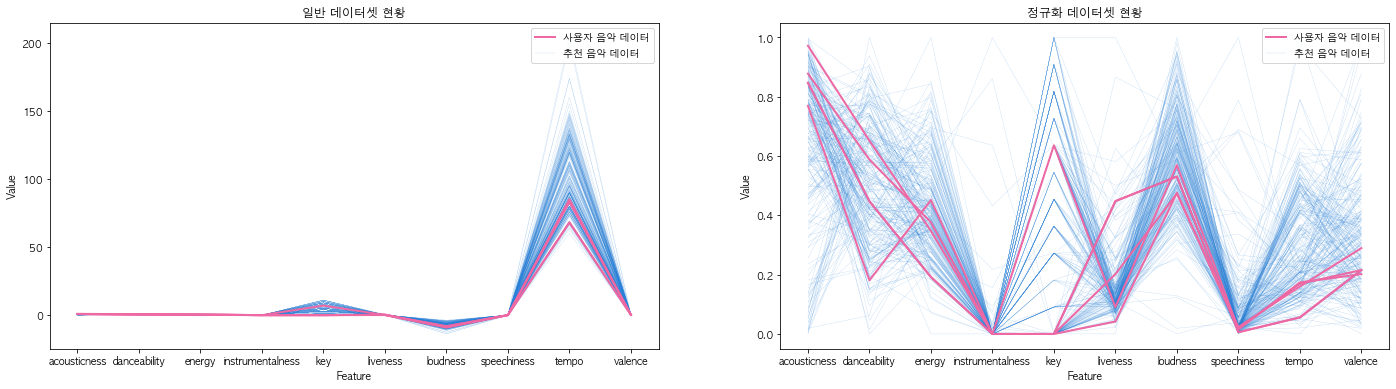

In [108]:
recommender.data_preprocessing()
recommender.draw_dataset()

# 5. KMeans Fitting

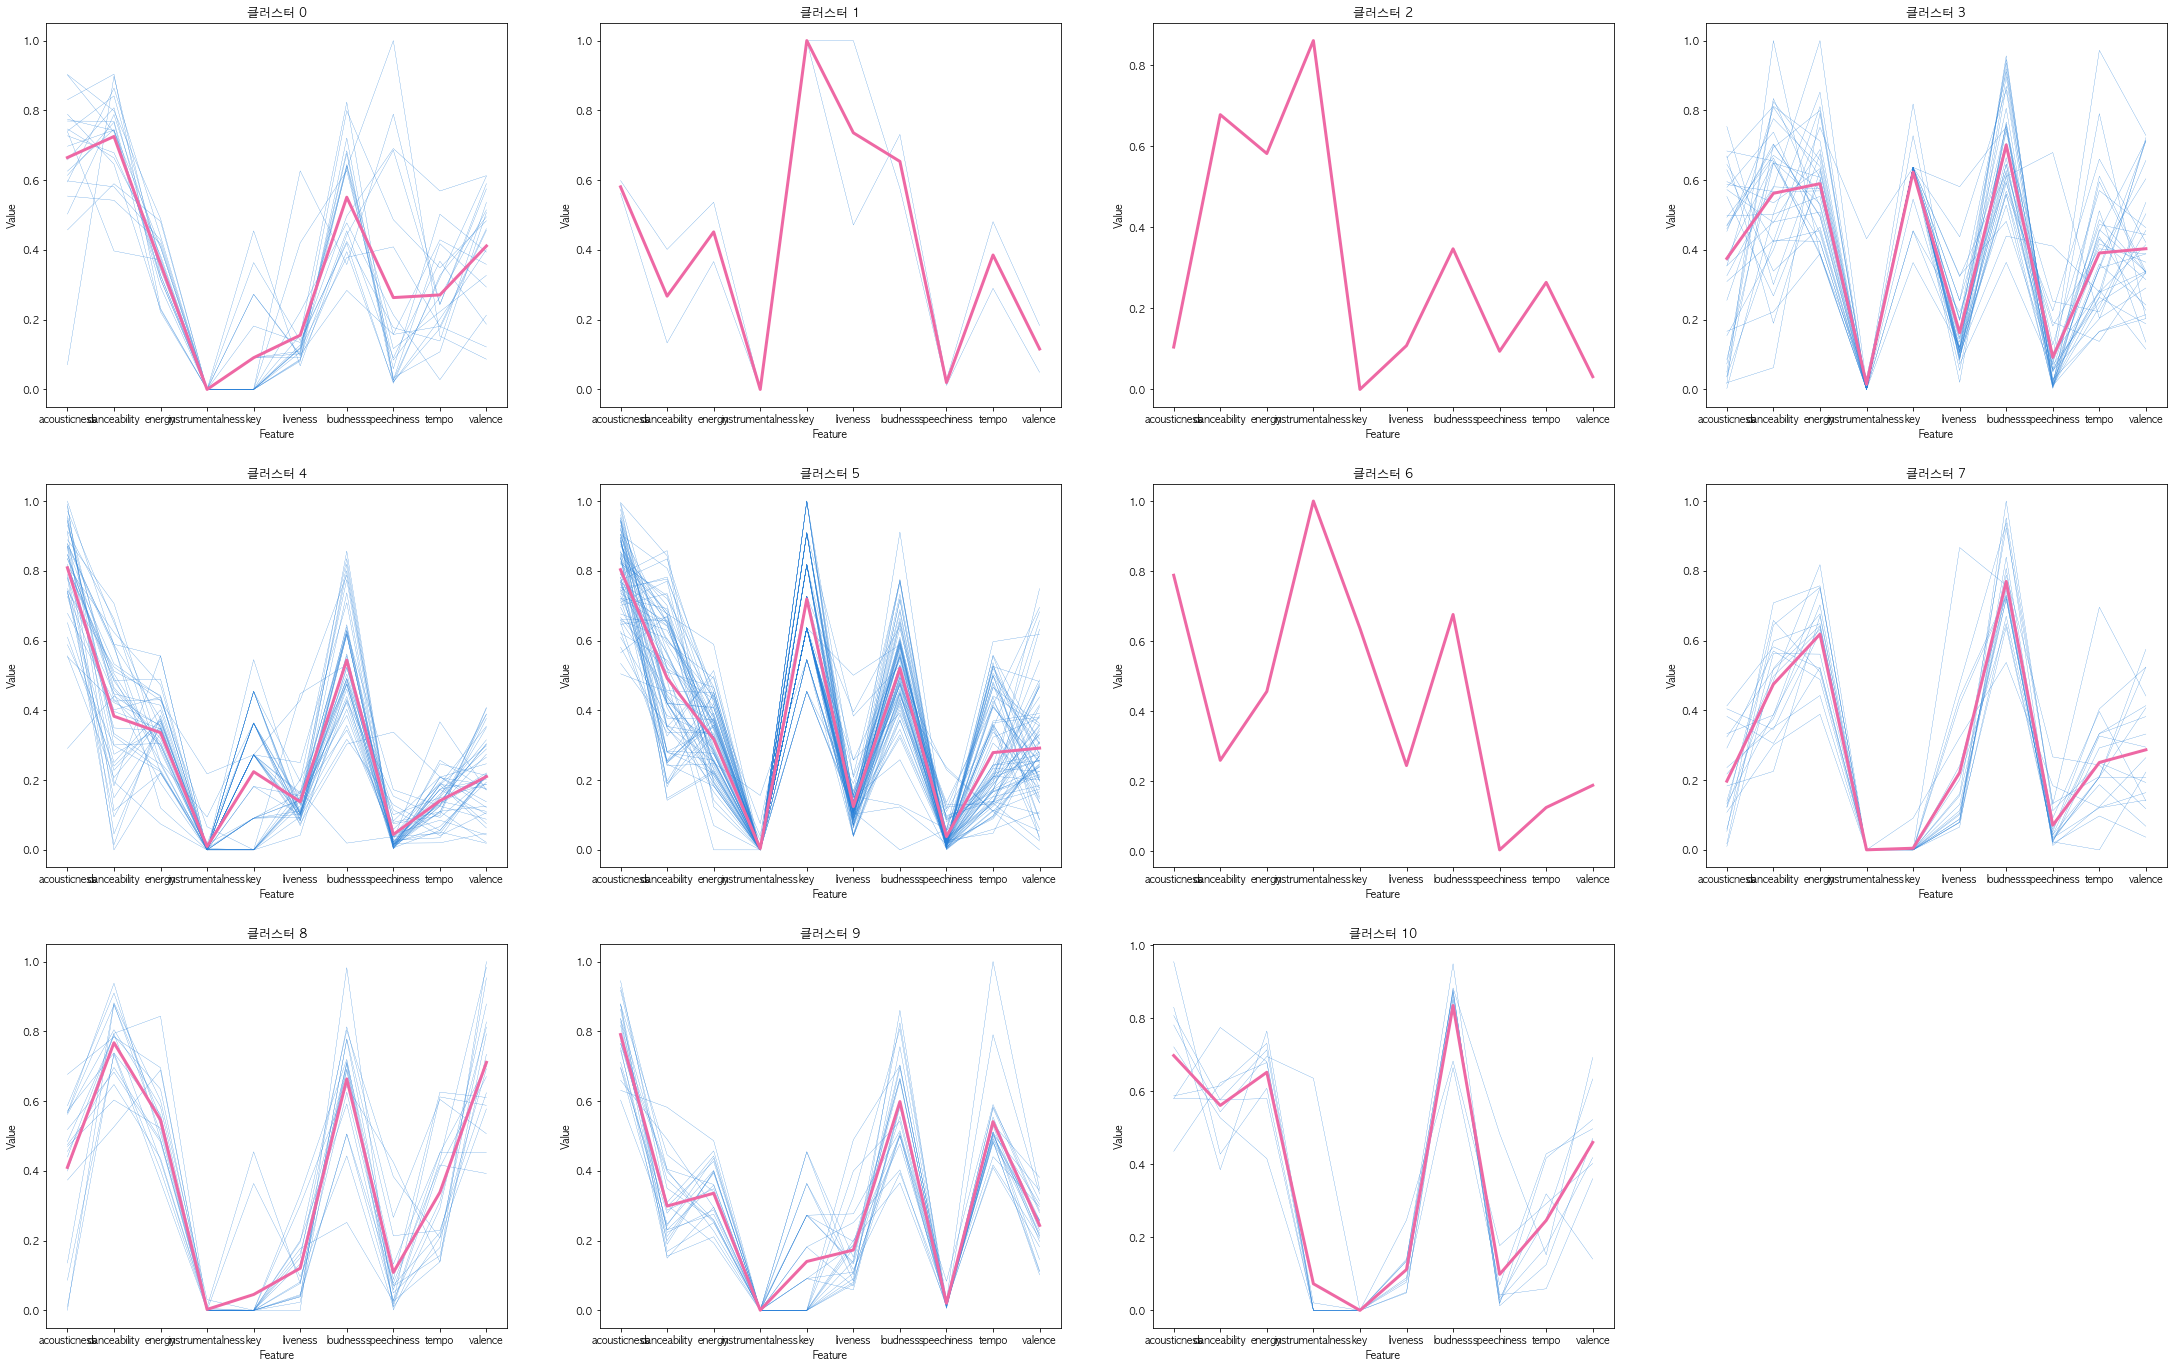

In [109]:
recommender.run()
Demo1._clear()
recommender.draw_cluster()

# 6. 추천 클러스터 파싱

### 우체통 <u>'6295aa0a317d54d61fddad2d'</u>의 음악들은 <u>클러스터[4 5]번</u>에 속해 있습니다.

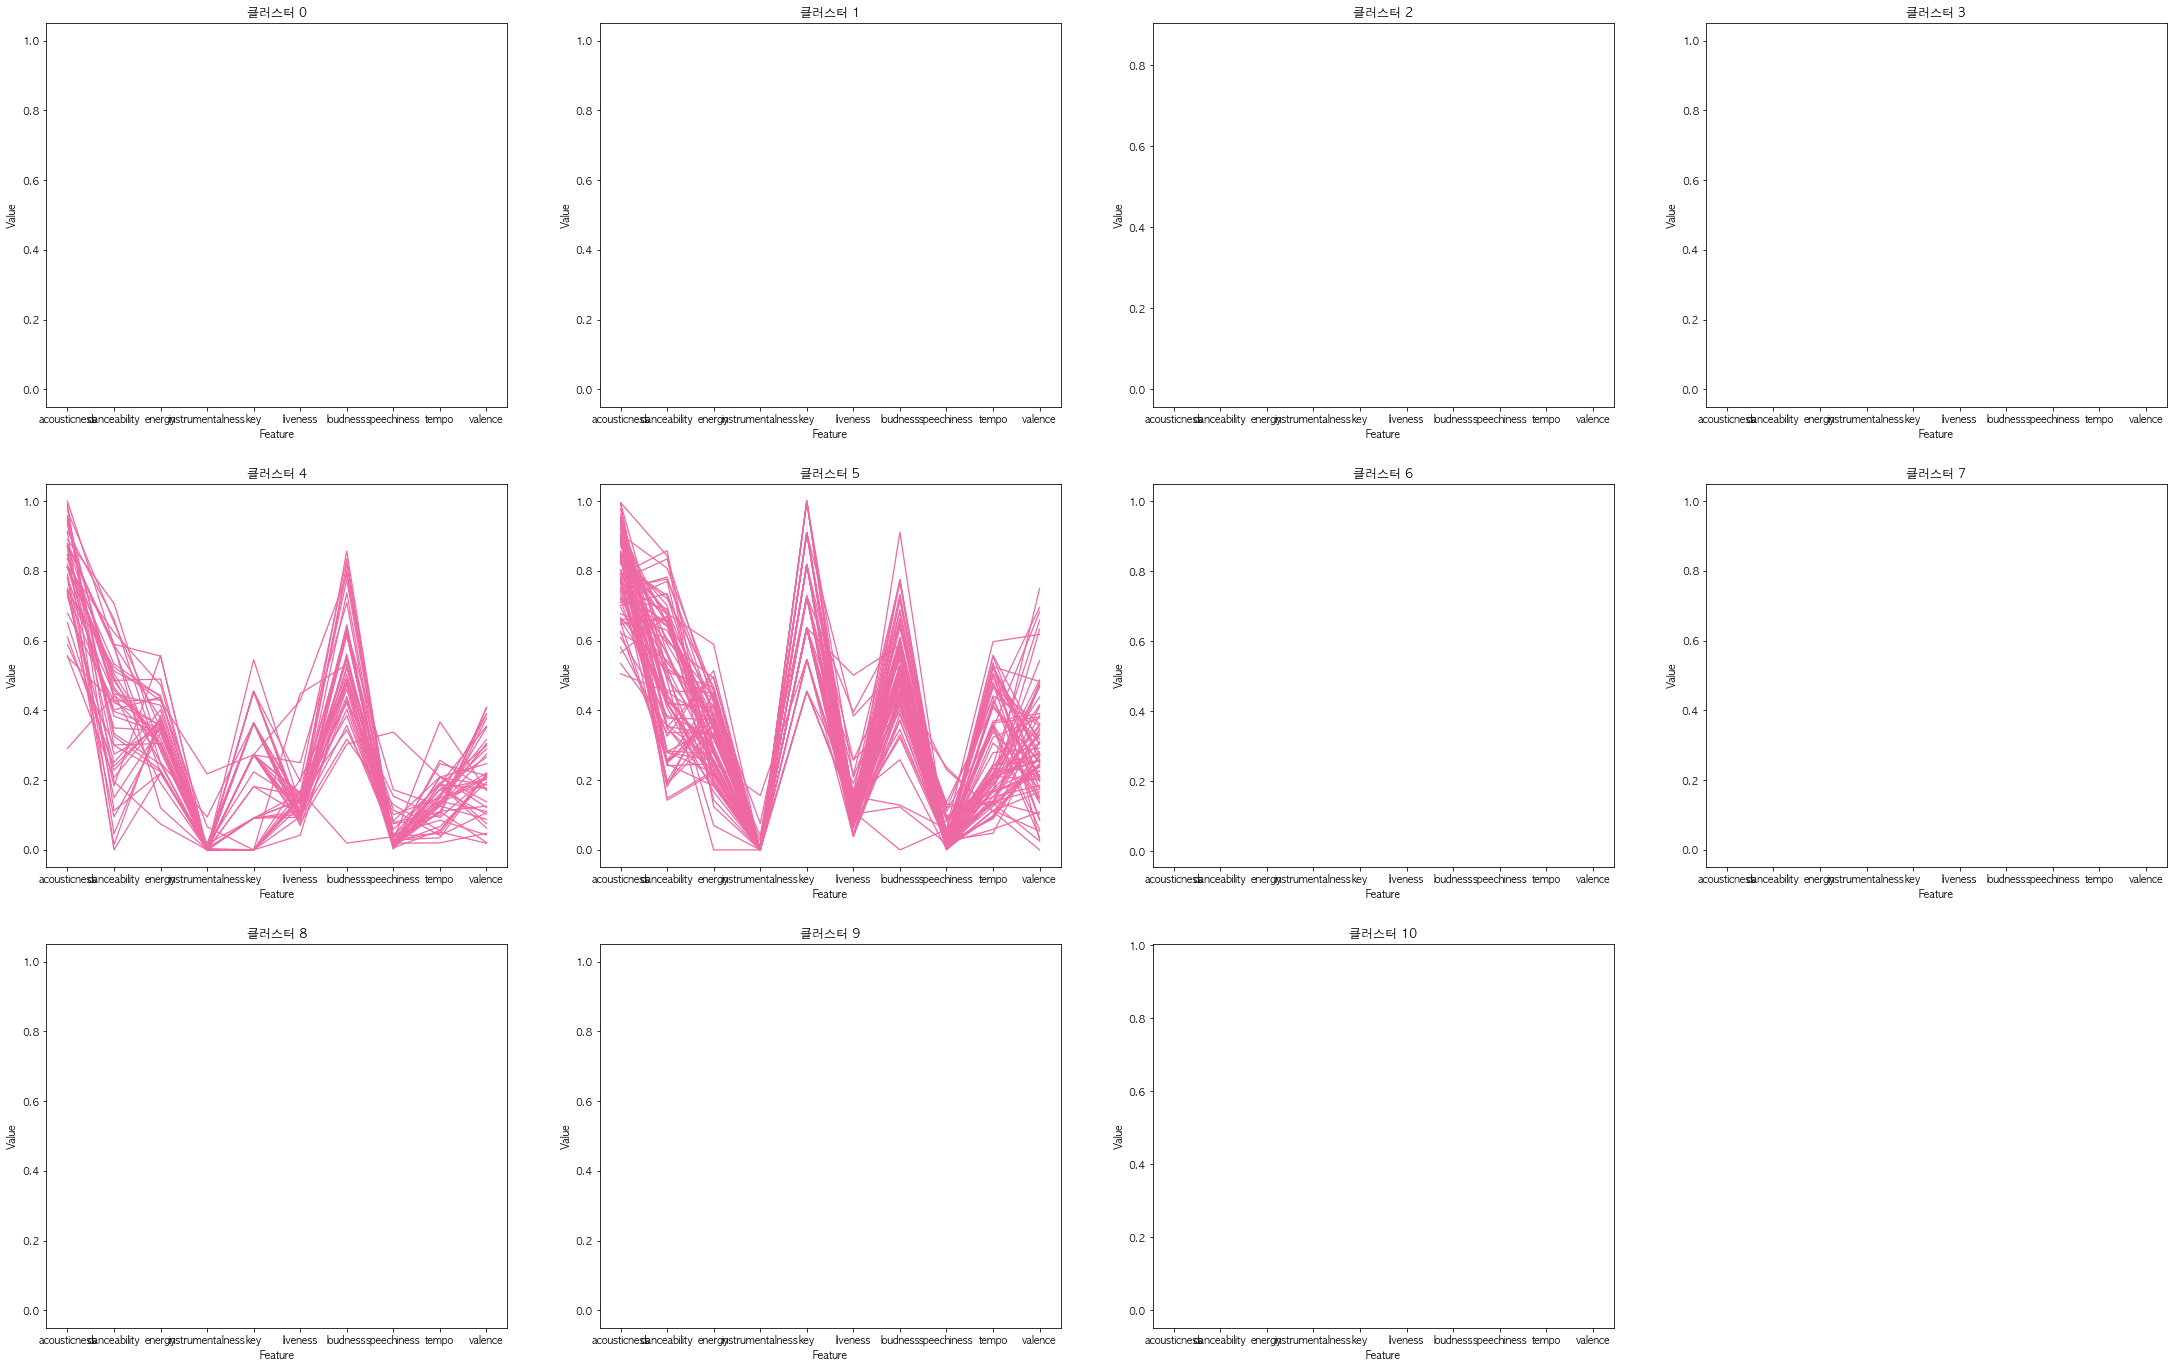

In [110]:
recommender.parse_reco_cluster()
Demo1.pt6_1(recommender)
recommender.draw_cluster()

In [111]:
Demo1.pt6_2(recommender)
recommender.reco_['tracks'].head()

### 우체통 <u>'6295aa0a317d54d61fddad2d'</u>를 위한 총 <u>119개의 추천음악</u>이 선정 되었습니다.

,trackId,trackName,artistIds,artistNames,image,seedId
0,2RttW7RAu5nOAfq6YFvApB,Happier,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,https://i.scdn.co/image/ab67616d0000b273ba5db4...,2y4hHM6c48Qzk0bqh33XfB
1,1e5qALs3pDrv203jX0XWAC,Autumn Breeze,0hRHbwZ0xSwfVHl4FTv7jq,Gummy,https://i.scdn.co/image/ab67616d0000b27339f1cc...,2y4hHM6c48Qzk0bqh33XfB
2,6jMbPsH6lTOLs5n8Af26AG,Maybe It's Time,"1HY2Jd0NmPuamShAr6KMms,4VIvfOurcf0vuLRxLkGnIG","Lady Gaga,Bradley Cooper",https://i.scdn.co/image/ab67616d0000b273e2d156...,2y4hHM6c48Qzk0bqh33XfB
3,5kRPPEWFJIMox5qIkQkiz5,Sweet Creature,6KImCVD70vtIoJWnq6nGn3,Harry Styles,https://i.scdn.co/image/ab67616d0000b2736c619c...,2y4hHM6c48Qzk0bqh33XfB
4,4OBZT9EnhYIV17t4pGw7ig,Best Part (feat. H.E.R.),3Y7RZ31TRPVadSFVy1o8os,H.E.R.,https://i.scdn.co/image/ab67616d0000b273b5d9c8...,2y4hHM6c48Qzk0bqh33XfB


# 7. 수량 조정 작업

### 현재 Seed음악들의 추천음악 수량 표준편차는 <u>14</u> 입니다.

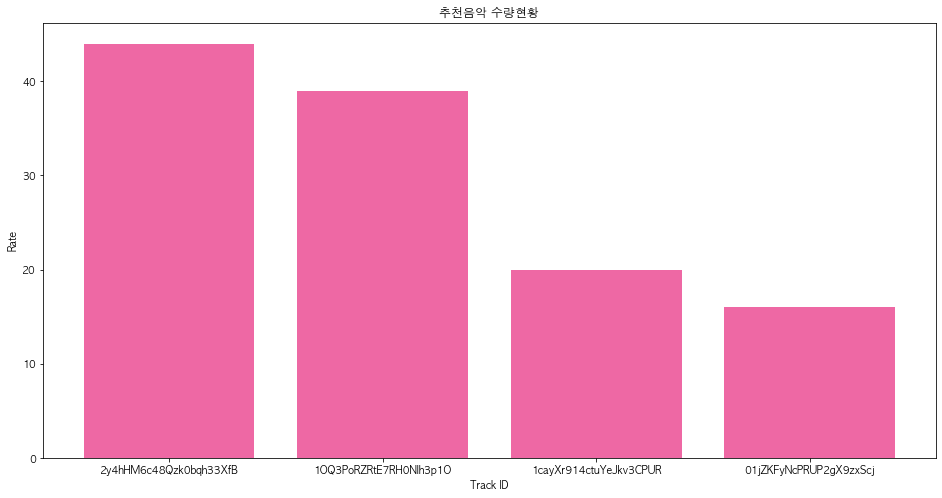

In [112]:
Demo1.pt7(recommender)
recommender.draw_rate()

### 현재 Seed음악들의 추천음악 수량 표준편차는 <u>8</u> 입니다.

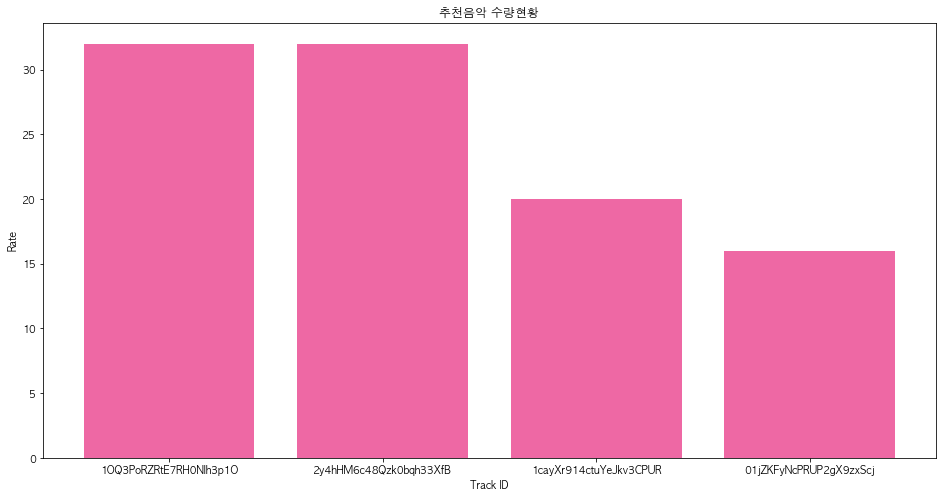

In [113]:
recommender.adjust_rate()
Demo1.pt7(recommender)
recommender.draw_rate()

# Letter
## 최종 추천 음악플레이리스트

### 우체통 <u>'6295aa0a317d54d61fddad2d'</u>를 위한 총 <u>100개의 추천음악</u>이 선정 되었습니다.

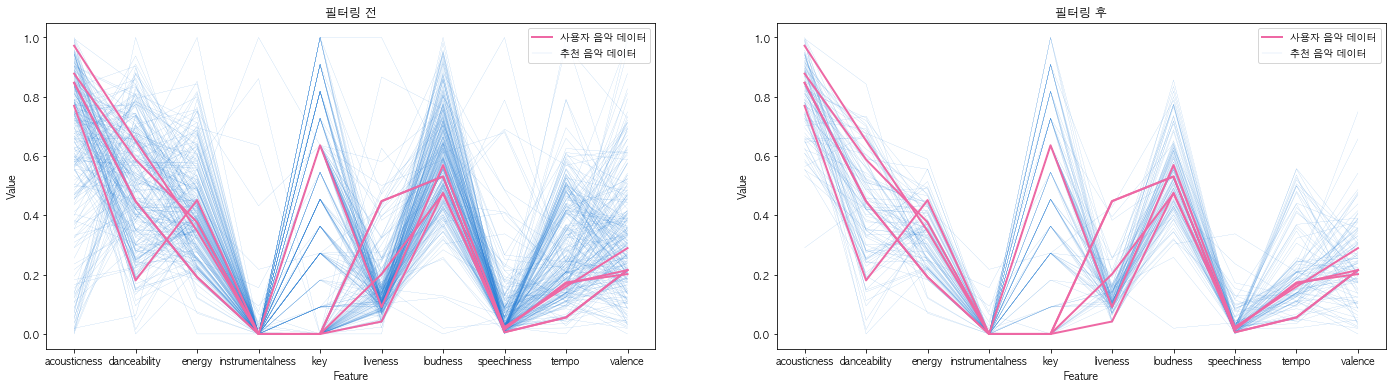

,trackId,trackName,artistIds,artistNames,image,seedId
0,2RttW7RAu5nOAfq6YFvApB,Happier,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,https://i.scdn.co/image/ab67616d0000b273ba5db4...,2y4hHM6c48Qzk0bqh33XfB
1,1e5qALs3pDrv203jX0XWAC,Autumn Breeze,0hRHbwZ0xSwfVHl4FTv7jq,Gummy,https://i.scdn.co/image/ab67616d0000b27339f1cc...,2y4hHM6c48Qzk0bqh33XfB
2,6jMbPsH6lTOLs5n8Af26AG,Maybe It's Time,"1HY2Jd0NmPuamShAr6KMms,4VIvfOurcf0vuLRxLkGnIG","Lady Gaga,Bradley Cooper",https://i.scdn.co/image/ab67616d0000b273e2d156...,2y4hHM6c48Qzk0bqh33XfB
3,5kRPPEWFJIMox5qIkQkiz5,Sweet Creature,6KImCVD70vtIoJWnq6nGn3,Harry Styles,https://i.scdn.co/image/ab67616d0000b2736c619c...,2y4hHM6c48Qzk0bqh33XfB
4,4OBZT9EnhYIV17t4pGw7ig,Best Part (feat. H.E.R.),3Y7RZ31TRPVadSFVy1o8os,H.E.R.,https://i.scdn.co/image/ab67616d0000b273b5d9c8...,2y4hHM6c48Qzk0bqh33XfB


In [114]:
Demo1.pt6_2(recommender)

recommender.draw_filtering()
recommender.reco_['tracks'].head()

In [115]:
mail_id = db.save_mail(recommender)
Demo1.pt8(recommender, mail_id)

### 우체통 <u>6295aa0a317d54d61fddad2d</u>를 위한 음악편지 <u>6295aaa5317d54d61fddad2f</u>를 넣어놨어요.